In [1]:
!unzip "/content/drive/My Drive/Copy of Diabetic Retinopathy.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Diabetic Retinopathy/Tlevel1/39343_right.jpeg  
  inflating: Diabetic Retinopathy/Tlevel1/39504_right.jpeg  
  inflating: Diabetic Retinopathy/Tlevel1/39582_left.jpeg  
  inflating: Diabetic Retinopathy/Tlevel1/39657_right.jpeg  
  inflating: Diabetic Retinopathy/Tlevel1/39744_right.jpeg  
  inflating: Diabetic Retinopathy/Tlevel1/39773_left.jpeg  
  inflating: Diabetic Retinopathy/Tlevel1/39805_right.jpeg  
  inflating: Diabetic Retinopathy/Tlevel1/39826_left.jpeg  
  inflating: Diabetic Retinopathy/Tlevel1/39834_left.jpeg  
  inflating: Diabetic Retinopathy/Tlevel1/39864_right.jpeg  
  inflating: Diabetic Retinopathy/Tlevel1/39968_left.jpeg  
  inflating: Diabetic Retinopathy/Tlevel1/39968_right.jpeg  
  inflating: Diabetic Retinopathy/Tlevel1/39999_left.jpeg  
  inflating: Diabetic Retinopathy/Tlevel1/40033_left.jpeg  
  inflating: Diabetic Retinopathy/Tlevel1/40202_right.jpeg  
  inflating: Diabetic Retinopathy/Tlevel1

In [2]:
bs = 32

In [3]:
from pathlib import Path
from fastai.vision import *
import numpy as np
path = Path('/content/Diabetic Retinopathy')
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(),bs=bs, size=224, num_workers=4).normalize(imagenet_stats)

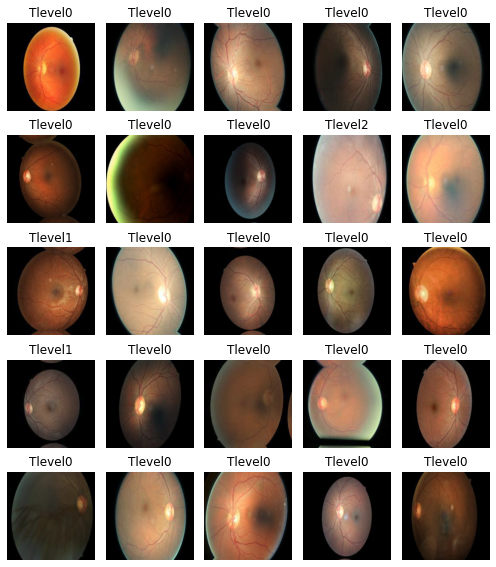

In [4]:
data.show_batch(rows=5, figsize=(7, 8))

In [5]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.densenet169, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/checkpoints/densenet169-b2777c0a.pth


In [6]:
from fastai.imports import *
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

path = Path("/content/Diabetic Retinopathy")

classes = ['Tlevel0','Tlevel1','Tlevel2','Tlevel3','Tlevel4']
data2 = ImageDataBunch.single_from_classes(path, classes, size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.densenet169)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


Tlevel3


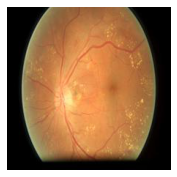

In [7]:
img = open_image("/content/Diabetic Retinopathy/Tlevel3/13889_right.jpeg")
learn = learn.load("/content/drive/My Drive/Copy of DiabeticRetinopathy")
img.show()
pred_class, pred_idx, outputs = learn.predict(img)
print(str(pred_class).capitalize())